In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import time as time
% matplotlib inline

In [2]:
def subset(S,k):
    target=np.copy(S[:,0])
    classes=list(np.unique(S[:,0]))
    A=np.empty((0,S.shape[1]))
    for i in classes:
        rows,columns=S[target==i].shape
        seed=np.random.choice(rows,size=int(math.ceil((k/S.shape[0])*float(rows))),replace=False)
        A=np.append(A,S[target==i][seed,:],axis=0)
    return A

In [3]:
def yfx_function(w,A):
    yfx=A[:,0].reshape(A.shape[0],1)* np.dot(A[:,1:],np.transpose(w))
    return yfx

In [4]:
def cost_function(w,A,l,k):
    norm= w.dot(w.T)[0][0]
    yfx=1-A[:,0].reshape(A.shape[0],1)* np.dot(A[:,1:],np.transpose(w))
    max_value= map(lambda x: max(x,0),yfx)
    cost= 0.5 * norm* l +  np.sum(max_value) / 2000.0
    return float(cost)

In [35]:
def myPegasos(S,l,k):
    w=np.zeros((1,S.shape[1]-1))
    cost=[]
    ktot=0
    t=0
    k=round(k*S.shape[0])
    while (t<1000) and (ktot<=100*S.shape[0]):    
        t=t+1
        ktot=ktot+k
        A=subset(S,k)
        yfx=yfx_function(w,A)
        Aplus=A[yfx[:,0]<1,:]
        learning_rate= 1.0/(l*(t))
        wthalf1=((1.0 - 1.0/t)*w)
        wthalf2=np.sum(np.multiply(Aplus[:,0].reshape(Aplus.shape[0],1),Aplus[:,1:]),axis=0)*(float(learning_rate)/k)
        wthalf2.reshape(1,wthalf2.shape[0])
        wthalf=wthalf1+wthalf2
        w=min(1,(1.0/(math.sqrt(l)*np.linalg.norm(wthalf))))*wthalf
        #cost.append(cost_function(w,S,l,k))
    return cost        

In [6]:
#k=1

In [36]:
t=[]
ite=0
cost=[]
while ite <5:
    ite=ite+1
    start_time = time.time()
    data=np.loadtxt("MNIST-13.csv",delimiter=",")
    data[data[:,0]==1,0]=1
    data[data[:,0]==3,0]=-1
    cost.append(myPegasos(data,1,1.0/2000.0))
    t.append(time.time() - start_time)

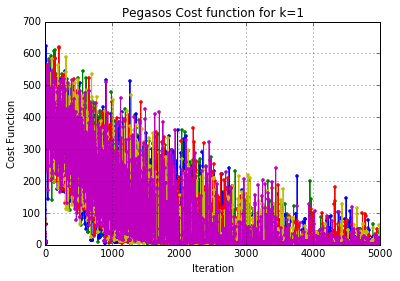

In [8]:
plt.figure()
plt.title("Pegasos Cost function for k=1")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.grid()
plt.plot(range(len(cost[0])), cost[0], '.-', color="g")
plt.plot(range(len(cost[1])), cost[1], '.-', color="b")
plt.plot(range(len(cost[2])), cost[2], '.-', color="r")
plt.plot(range(len(cost[3])), cost[3], '.-', color="y")
plt.plot(range(len(cost[4])), cost[4], '.-', color="m")
plt.savefig('Pegasos,k=1.png')
plt.show()

In [37]:
print "mean k=1" 
print np.mean(t)
print "------------------"
print "std deveation k=1"
print np.std(t)

mean k=1
15.4431999683
------------------
std deveation k=1
0.358531096677


In [12]:
#k=20

In [38]:
t=[]
ite=0
cost=[]
while ite <5:
    ite=ite+1
    start_time = time.time()
    data=np.loadtxt("MNIST-13.csv",delimiter=",")
    data[data[:,0]==1,0]=1
    data[data[:,0]==3,0]=-1
    cost.append(myPegasos(data,1,0.01))
    t.append(time.time() - start_time)

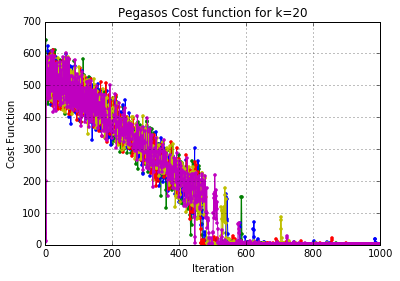

In [14]:
plt.figure()
plt.title("Pegasos Cost function for k=20")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.grid()
plt.plot(range(len(cost[0])), cost[0], '.-', color="g")
plt.plot(range(len(cost[1])), cost[1], '.-', color="b")
plt.plot(range(len(cost[2])), cost[2], '.-', color="r")
plt.plot(range(len(cost[3])), cost[3], '.-', color="y")
plt.plot(range(len(cost[4])), cost[4], '.-', color="m")
plt.savefig('Pegasos,k=20.png')
plt.show()

In [39]:
print "mean k=20" 
print np.mean(t)
print "------------------"
print "std deveation k=20"
print np.std(t)

mean k=20
17.6866000175
------------------
std deveation k=20
0.419472816458


In [17]:
#k=200

In [40]:
t=[]
ite=0
cost=[]
while ite <5:
    ite=ite+1
    start_time = time.time()
    data=np.loadtxt("MNIST-13.csv",delimiter=",")
    data[data[:,0]==1,0]=1
    data[data[:,0]==3,0]=-1
    cost.append(myPegasos(data,1,0.1))
    t.append(time.time() - start_time)

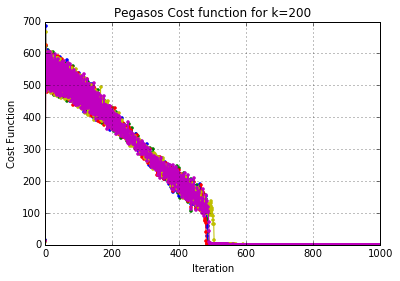

In [19]:
plt.figure()
plt.title("Pegasos Cost function for k=200")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.grid()
plt.plot(range(len(cost[0])), cost[0], '.-', color="g")
plt.plot(range(len(cost[1])), cost[1], '.-', color="b")
plt.plot(range(len(cost[2])), cost[2], '.-', color="r")
plt.plot(range(len(cost[3])), cost[3], '.-', color="y")
plt.plot(range(len(cost[4])), cost[4], '.-', color="m")
plt.savefig('Pegasos,k=200.png')
plt.show()

In [41]:
print "mean k=200" 
print np.mean(t)
print "------------------"
print "std deveation k=200"
print np.std(t)

mean k=200
18.5807999611
------------------
std deveation k=200
0.328493768868


In [ ]:
#k=1000

In [42]:
t=[]
ite=0
cost=[]
while ite <5:
    ite=ite+1
    start_time = time.time()
    data=np.loadtxt("MNIST-13.csv",delimiter=",")
    data[data[:,0]==1,0]=1
    data[data[:,0]==3,0]=-1
    cost.append(myPegasos(data,1,0.5))
    t.append(time.time() - start_time)

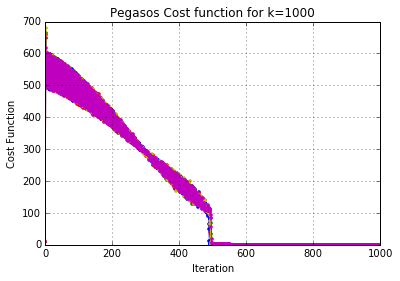

In [23]:
plt.figure()
plt.title("Pegasos Cost function for k=1000")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.grid()
plt.plot(range(len(cost[0])), cost[0], '.-', color="g")
plt.plot(range(len(cost[1])), cost[1], '.-', color="b")
plt.plot(range(len(cost[2])), cost[2], '.-', color="r")
plt.plot(range(len(cost[3])), cost[3], '.-', color="y")
plt.plot(range(len(cost[4])), cost[4], '.-', color="m")
plt.savefig('Pegasos,k=1000.png')
plt.show()

In [43]:
print "mean k=1000" 
print np.mean(t)
print "------------------"
print "std deveation k=1000"
print np.std(t)

mean k=1000
7.69099998474
------------------
std deveation k=1000
0.18840056605


In [ ]:
#k=2000

In [44]:
t=[]
ite=0
cost=[]
while ite <5:
    ite=ite+1
    start_time = time.time()
    data=np.loadtxt("MNIST-13.csv",delimiter=",")
    data[data[:,0]==1,0]=1
    data[data[:,0]==3,0]=-1
    cost.append(myPegasos(data,1,1.0))
    t.append(time.time() - start_time)

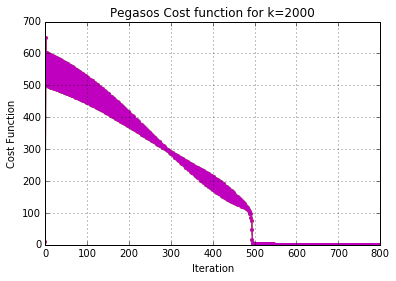

In [29]:
plt.figure()
plt.title("Pegasos Cost function for k=2000")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.grid()
plt.plot(range(len(cost[0])), cost[0], '.-', color="g")
plt.plot(range(len(cost[1])), cost[1], '.-', color="b")
plt.plot(range(len(cost[2])), cost[2], '.-', color="r")
plt.plot(range(len(cost[3])), cost[3], '.-', color="y")
plt.plot(range(len(cost[4])), cost[4], '.-', color="m")
plt.savefig('Pegasos,k=2000.png')
plt.show()

In [45]:
print "mean k=2000" 
print np.mean(t)
print "------------------"
print "std deveation k=2000"
print np.std(t)

mean k=2000
6.04519996643
------------------
std deveation k=2000
0.0627292422354
